# How does wildfire impact air quality?

## The goal of this notebook is to perform exploratory data analysis in order to better understand the data. This will be followed by building models consistent with a machine learning framework.

### Imports

In [115]:
# Needed imports

import pandas as pd
import numpy as np
import os
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### Data Loading

In [116]:
# Load the data
script_dir = os.getcwd()

df = pd.read_csv(f'{script_dir}/air_quality_weather_fires.csv')

df = df.dropna()

df

Unnamed: 0        date      site_id   latitude   longitude  state_name  \
0               0  2024-01-01  01-073-0023  33.553056  -86.815000     Alabama   
1               1  2024-01-01  04-013-9997  33.503833 -112.095767     Arizona   
2               2  2024-01-01  04-019-1028  32.295150 -110.982300     Arizona   
3               3  2024-01-01  05-119-0007  34.756189  -92.281296    Arkansas   
4               4  2024-01-01  06-001-0011  37.814781 -122.282347  California   
...           ...         ...          ...        ...         ...         ...   
19797       19797  2024-12-31  49-035-3015  40.777145 -111.945849        Utah   
19798       19798  2024-12-31  50-021-0002  43.608056  -72.982778     Vermont   
19799       19799  2024-12-31  51-087-0014  37.556520  -77.400270    Virginia   
19800       19800  2024-12-31  53-033-0080  47.568236 -122.308628  Washington   
19801       19801  2024-12-31  56-021-0100  41.182227 -104.778334     Wyoming   

      county_name           city_name  \
0       Jefferson          Birmingham   
1        Maricopa             Phoenix   
2            Pima              Tucson   
3         Pulaski   North Little Rock   
4         Alameda             Oakland   
...           ...                 ...   
19797   Salt Lake      Salt Lake City   
19798     Rutland             Rutland   
19799     Henrico  East Highland Park   
19800        King             Seattle   
19801     Laramie            Cheyenne   

                                         site_name   PM25  ...  \
0                                 North Birmingham  11.55  ...   
1                                    JLG SUPERSITE  85.35  ...   
2                            CHILDREN'S PARK NCore  16.30  ...   
3                                             PARR   5.90  ...   
4                                     Oakland West   6.90  ...   
...                                            ...    ...  ...   
19797                        Utah Technical Center   4.50  ...   
19798  State of Vermont District Court Parking Lot   4.70  ...   
19799                MathScience Innovation Center   5.60  ...   
19800                        SEATTLE - BEACON HILL   3.40  ...   
19801                               Cheyenne NCore   3.60  ...   

       fires_within_100km  has_nearby_fire    datetime  month  day_of_week  \
0                       3                1  2024-01-01      1            0   
1                       0                1  2024-01-01      1            0   
2                       0                1  2024-01-01      1            0   
3                       0                1  2024-01-01      1            0   
4                       9                1  2024-01-01      1            0   
...                   ...              ...         ...    ...          ...   
19797                   0                1  2024-12-31     12            1   
19798                   0                1  2024-12-31     12            1   
19799                   5                1  2024-12-31     12            1   
19800                   1                1  2024-12-31     12            1   
19801                   0                1  2024-12-31     12            1   

       is_weekend  season  wildfire_season  fire_distance_category  \
0               0  winter                0                   close   
1               0  winter                0                     far   
2               0  winter                0                     far   
3               0  winter                0                     far   
4               0  winter                0                   close   
...           ...     ...              ...                     ...   
19797           0  winter                0                     far   
19798           0  winter                0                     far   
19799           0  winter                0                   close   
19800           0  winter                0                moderate   
19801           0  winter                

In [117]:
df.T

0              1      \
Unnamed: 0                                  0              1   
date                               2024-01-01     2024-01-01   
site_id                           01-073-0023    04-013-9997   
latitude                            33.553056      33.503833   
longitude                             -86.815    -112.095767   
state_name                            Alabama        Arizona   
county_name                         Jefferson       Maricopa   
city_name                          Birmingham        Phoenix   
site_name                    North Birmingham  JLG SUPERSITE   
PM25                                    11.55          85.35   
CO                                        0.3            1.3   
O3                                      0.027          0.021   
NO2                                      24.3           37.3   
SO2                                       1.8            2.3   
AQI_PM25                                 57.0          176.0   
AQI_CO                                    3.0           15.0   
AQI_O3                                   25.0           19.0   
AQI_NO2                                    23             35   
AQI_SO2                                   1.0            3.0   
AQI                                      57.0          176.0   
temperature_2m_mean                       6.2           10.7   
temperature_2m_max                        9.9           16.5   
temperature_2m_min                        3.2            6.3   
relative_humidity_2m_mean                63.0           66.0   
wind_speed_10m_mean                      11.6            6.3   
wind_direction_10m_dominant             317.0           45.0   
precipitation_sum                         0.0            0.0   
precipitation_hours                       0.0            0.0   
et0_fao_evapotranspiration               1.78            1.4   
weather_code                         Overcast       Overcast   
distance_to_fire_km                 36.661749     114.379578   
fire_brightness                        298.82         296.16   
fire_frp                                 0.76           8.56   
fires_within_50km                           3              0   
fires_within_100km                          3              0   
has_nearby_fire                             1              1   
datetime                           2024-01-01     2024-01-01   
month                                       1              1   
day_of_week                                 0              0   
is_weekend                                  0              0   
season                                 winter         winter   
wildfire_season                             0              0   
fire_distance_category                  close            far   
fire_intensity                            low            low   

                                             2                  3      \
Unnamed: 0                                       2                  3   
date                                    2024-01-01         2024-01-01   
site_id                                04-019-1028        05-119-0007   
latitude                                  32.29515          34.756189   
longitude                                -110.9823         -92.281296   
state_name                                 Arizona           Arkansas   
county_name                                   Pima            Pulaski   
city_name                                   Tucson  North Little Rock   
site_name                    CHILDREN'S PARK NCore               PARR   
PM25                                          16.3                5.9   
CO                                             0.4                0.0   
O3                                           0.033              0.026   
NO2                                           22.2                4.5   
SO2                                            0.2                0.6   
AQI_PM25                                      67.0              

## 1. How do PM2.5 levels vary by location over time?

In [118]:
# Begin with a basic plot exploring site names and overall days
pm25_site_time_basic = px.scatter(df, x='datetime', y='PM25', color='site_name', title='PM2.5 Levels by US Site over Time')
pm25_site_time_basic.update_layout(font=dict(size=12, family="Cuprum"))
pm25_site_time_basic.show()

Observations:
- Peak in July of 2024
- Other peaks in January of 2024, September of 2024, and December of 2024
- Dallas Hinton had a great number of fires in succession between March and May of 2024
- Data are too granular to draw further conclusions

In [119]:
# Consolidate sites into states for ease of viewing 
pm25_state_time = px.scatter(df, x='datetime', y='PM25', color='state_name', title='PM2.5 Levels by US State over Time')
pm25_state_time.update_layout(font=dict(size=12, family="Cuprum"))
pm25_state_time.show()

Observations:
- California appears to have the highest number of fires
- Again, data very granular

In [120]:
# Consolidate dates into seasons for a less granular analysis as well
pm25_state_seasons = px.scatter(df, x='season', y='PM25', color='state_name', title='PM2.5 Values by US State by Season')
pm25_state_seasons.update_layout(font=dict(size=12, family="Cuprum"))
pm25_state_seasons.show()

Observations:
- PM25 values are lowest in spring and appear highest in summer

In [121]:
# Break scatterplot down into box plots, maintain states and seasons variables
pm25_state_seasons_box = px.box(df, x='season', y='PM25', color='state_name', title='PM2.5 Values by US State by Season')
pm25_state_seasons_box.update_layout(font=dict(size=12, family="Cuprum"))
pm25_state_seasons_box.show()

Observations:
- Spring still has the lowest levels, with summer having the highest levels
- There are so many individual data points that visual analysis is difficult. See note below.

**It remains difficult to draw conclusions from these data visualizations based on the granularity of each data point. Further grouping is needed to make visually clear and statistically significant determinations.**

In [122]:
# Transforming state names to regions
# Courtesy of https://gist.github.com/rogerallen/1583593
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "Virgin Islands, U.S.": "VI",
    "District Of Columbia": "DC"
}

# Group states into regions: N - North East W - West M - Mid West S - South O - Other
# Courtesy of https://code.activestate.com/recipes/580661-states-to-regions/#:~:text=States%20to%20Regions%20«%20Python%20recipes,◄
us_state_to_region = {
        'AK': 'O',
        'AL': 'S',
        'AR': 'S',
        'AZ': 'W',
        'CA': 'W',
        'CO': 'W',
        'CT': 'N',
        'DC': 'N',
        'DE': 'N',
        'FL': 'S',
        'GA': 'S',
        'GU': 'O',
        'HI': 'O',
        'IA': 'M',
        'ID': 'W',
        'IL': 'M',
        'IN': 'M',
        'KS': 'M',
        'KY': 'S',
        'LA': 'S',
        'MA': 'N',
        'MD': 'N',
        'ME': 'N',
        'MI': 'W',
        'MN': 'M',
        'MO': 'M',
        'MP': 'O',
        'MS': 'S',
        'MT': 'W',
        'NA': 'O',
        'NC': 'S',
        'ND': 'M',
        'NE': 'W',
        'NH': 'N',
        'NJ': 'N',
        'NM': 'W',
        'NV': 'W',
        'NY': 'N',
        'OH': 'M',
        'OK': 'S',
        'OR': 'W',
        'PA': 'N',
        'PR': 'O',
        'RI': 'N',
        'SC': 'S',
        'SD': 'M',
        'TN': 'S',
        'TX': 'S',
        'UT': 'W',
        'VA': 'S',
        'VI': 'O',
        'VT': 'N',
        'WA': 'W',
        'WI': 'M',
        'WV': 'S',
        'WY': 'W'
}

region_abbr_spell = {"N": "Northeast", "W": "West", "M": "Midwest", "S": "South", "O": "Other"}

df['state_code'] = df['state_name'].replace(us_state_to_abbrev)
df['region'] = df['state_code'].replace(us_state_to_region)
df['region'] = df['region'].replace(region_abbr_spell)

In [123]:
# Another set of box plots, based on regions and seasons variables
pm25_region_seasons_box = px.box(df, x='season', y='PM25', color='region', title='PM2.5 Levels by Season and US Region')
pm25_region_seasons_box.update_layout(font=dict(size=12, family="Cuprum"))
pm25_region_seasons_box.show()

Observations:
- The "Other" region has the lowest PM2.5 levels 
- The West has the highest levels, especially in summer and winter

In [124]:
# Start with an ANOVA test of PM25 by region and by season to verify or deny observations in box plot above, as well as add more detail

# One way ANOVA for region
south = df.loc[df['region'] == 'south', 'PM25']
west= df.loc[df['region'] == 'west', 'PM25']
northeast= df.loc[df['region'] == 'northeast', 'PM25']
midwest= df.loc[df['region'] == 'midwest', 'PM25']
other= df.loc[df['region'] == 'other', 'PM25']

f_statistic, p_value = f_oneway(south, west, northeast, midwest, other)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: nan
P-value: nan


/var/folders/v4/nmf8gnpn5vb2t2vlt0df52mh0000gn/T/ipykernel_27897/2724466862.py:10: SmallSampleWarning:

One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.



In [125]:
# Try just comparing the West (a region known for fires) and the South (our region of residence) in an AB test

# Revisualize the boxplots

df_ws = df[(df['region'] == 'West') | (df['region'] == 'South')]

pm25_ws_seasons_box = px.box(df_ws, x='season', y='PM25', color='region', title='PM2.5 Values in the US West and South by Season')
pm25_ws_seasons_box.update_layout(font=dict(size=24, family="Cuprum"))
pm25_ws_seasons_box.show()

Observations:
- The West has more high outliers than the South, and slightly higher (with the exception of summer) IQR 

In [126]:
# AB Test

#  Null hypothesis: PM2.5 levels do not differ by region between West and Northeast

# Separate the data into groups
west = df[df['region'] == 'West']['PM25']
south = df[df['region'] == 'South']['PM25']

# Display basic statistics
print("West Mean PM2.5:", west.mean())
print("South Mean PM2.5:", south.mean())


# Perform an independent samples t-test
# Welch's t-test does not assume equal variance
t_stat, p_value = ttest_ind(west, south, equal_var=False) 

print("\nt-statistic:", t_stat)
print("p-value:", p_value)

# Interpret the results with a significance level of 0.05 (most common)
alpha = 0.05 

if p_value < alpha:
    print("\nResult: There is a statistically significant difference in PM2.5 levels in the West and the South.")
    if west.mean() > northeast.mean():
        print("Conclusion: There are higher PM2.5 levels in the West than in the South.")
    else:
        print("Result: There are higher PM2.5 levels in the South than in the West.")
else:
    print("\nConclusion: There is no statistically significant difference in PM2.5 levels in the West and the South.")
    print("Conclusion: Fail to reject the null hypothesis.")

West Mean PM2.5: 7.420269839099321
South Mean PM2.5: 8.438305566982038

t-statistic: -10.45729643072078
p-value: 1.7448965539757548e-25

Result: There is a statistically significant difference in PM2.5 levels in the West and the South.
Result: There are higher PM2.5 levels in the South than in the West.


In [127]:
# Also try just comparing seasons in an ANOVA test

# Revisualize the boxplots

pm25_seasons_box = px.box(df, x='season', y='PM25', title='PM2.5 Levels by Season Across the United States')
pm25_seasons_box.update_layout(font=dict(size=24, family="Cuprum"))
pm25_seasons_box.show()

Observations:
- There are many high outliers and almost no low outliers
- Summer and winter appear to have higher PM2.5 values than spring and fall

In [128]:
# One way ANOVA for season

# Null hypothesis: there is no difference in PM2.5 levels across seasons in the United States

winter = df.loc[df['season'] == 'winter', 'PM25']
spring = df.loc[df['season'] == 'spring', 'PM25']
summer = df.loc[df['season'] == 'summer', 'PM25']
fall = df.loc[df['season'] == 'fall', 'PM25']

f_statistic, p_value = f_oneway(winter, spring, summer, fall)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 198.1380245704354
P-value: 1.2950307400386253e-126


Our f-statistic is high, while our p-value is extremely low. We can reject the null hypothesis and conclude that there is a statistically significant difference between seasons' PM2.5 values. Conduct more analysis to determine which seasons are different from each other.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  fall spring  -1.2727   0.0 -1.5381 -1.0072   True
  fall summer   1.1242   0.0  0.8595  1.3888   True
  fall winter   0.4791   0.0  0.2128  0.7455   True
spring summer   2.3968   0.0  2.1354  2.6583   True
spring winter   1.7518   0.0  1.4886   2.015   True
summer winter   -0.645   0.0 -0.9074 -0.3827   True
---------------------------------------------------


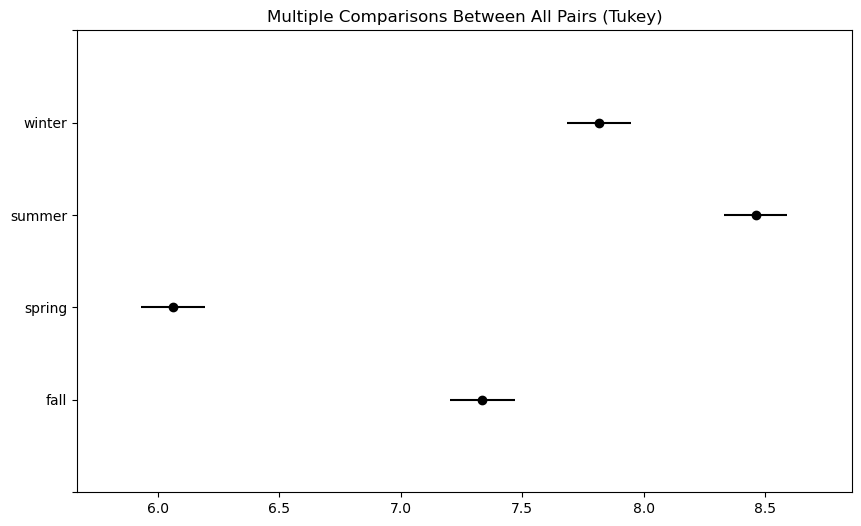

In [129]:
tukey_results = pairwise_tukeyhsd(endog=df['PM25'], groups=df['season'], alpha=0.05)

# Print the results table
print(tukey_results)

# Plot the results
results = tukey_results.plot_simultaneous()

Observations:
- We reject the null in all pairwise comparisons - each season has statistically different PM2.5 levels from each other in the United States.
- Summer has the highest PM2.5 levels, followed by winter, then fall, then spring with the lowest.
- This tracks with previous visual observations

## 2. How much do nearby fires impact PM2.5 levels?

In [130]:
# Explore how the distance to a fire impacts PM2.5 levels. Include a parameter for fire brightness for further information.

pm25_dist_bright = px.scatter(df, x='distance_to_fire_km', y='PM25', color='fire_brightness', trendline='lowess',
                    title='Impact of Distance from Fire and Fire Brightness on PM2.5 Levels')
pm25_dist_bright.update_layout(font=dict(size=24, family="Cuprum"))
pm25_dist_bright.show()

KeyboardInterrupt: 

Observations:
- The PM2.5 levels increase nonlinearly as distance to fire decreases. Fire brightness does not have a visually cohesive result. 

## 3. How Correlated are Our Variables?

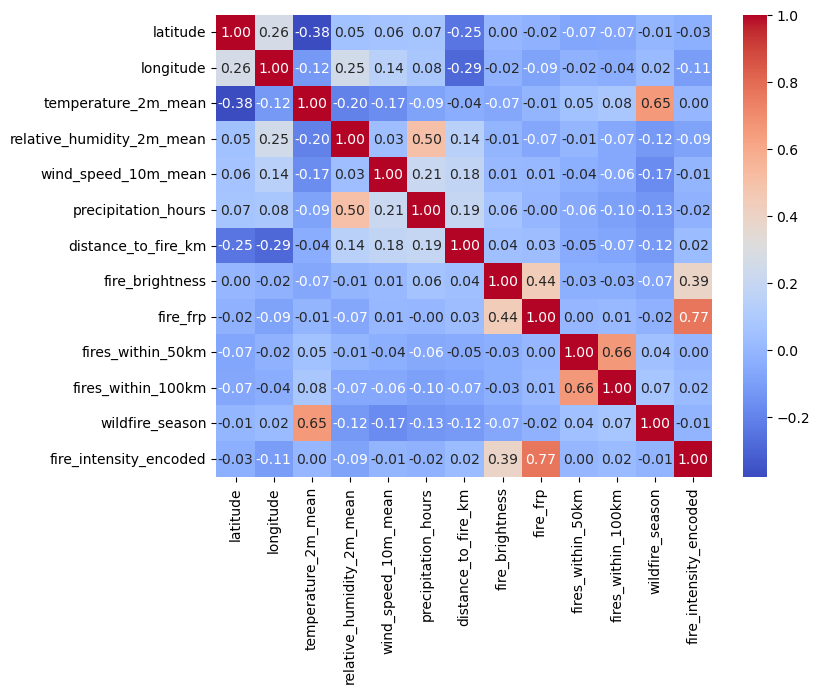

In [ ]:
# Target variable 
target = 'AQI_PM25'

#Predictors -> weather + fire + pollutants
# Using mean temperature and weather data
# Dropping `has_fire_nearby` since we are trying to detect wildfire impacts and it is also explained by the distance from fire columns 
predictors = [
    'latitude', 'longitude',
    'temperature_2m_mean', 'relative_humidity_2m_mean',
    'wind_speed_10m_mean',
    'precipitation_hours',
    'distance_to_fire_km', 'fire_brightness', 'fire_frp',
    'fires_within_50km', 'fires_within_100km', 'fire_intensity',
    'wildfire_season'
]

#Fire intensity needs to be ordinally encoded since it is categorical
mapping = {'no_fire':0,'low': 1, 'moderate': 2, 'high': 3,'extreme':4}
df['fire_intensity_encoded'] = df['fire_intensity'].map(mapping)
predictors.remove('fire_intensity')
predictors.append('fire_intensity_encoded')

#Dropping missing values
df = df.dropna(subset=predictors + [target])

#Make correlation plot
corr = df[predictors].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

## 4. What is Wildfire's Impact on Pollutants?

In [ ]:
data = pd.read_csv("air_quality_weather_fires.csv")

In [ ]:
# List of pollutants
pollutants = ['PM25','CO','O3','NO2','SO2']

# Set up the subplot grid
fig, axes = plt.subplots(1, len(pollutants), figsize=(20,5), sharey=False)

for i, pollutant in enumerate(pollutants):
    sns.boxplot(
        x='has_nearby_fire', 
        y=pollutant, 
        data=data, 
        ax=axes[i]
    )
    axes[i].set_title(pollutant)
    axes[i].set_xlabel('Nearby Fire')
    axes[i].set_ylabel('')  # Keep y-labels clean

plt.tight_layout()
plt.show()

In [ ]:
order = ['no_fire', 'low', 'moderate', 'high', 'extreme']
data['fire_intensity'] = pd.Categorical(data['fire_intensity'], categories=order, ordered=True)

data.groupby('fire_intensity')[['PM25','CO','O3','NO2','SO2']].mean().plot(kind='bar')
plt.title('Average Pollutants by Fire Intensity')
plt.show()

NO2: It is consistently the highest among all pollutants across all fire intensity categories, even when there’s no fire. This suggests NO2 levels are high regardless of wildfires likely influenced by traffic or industrial sources. However, there is a slight increase as we get closer to extreme fires.

PM2.5: It increases slightly with fire intensity. It’s higher for extreme and high intensity fires compared to no_fire. This indicates that wildfires contribute to PM2.5, which is expected since wildfire smoke contains fine particulate matter. However, it is similar across low,moderate and high.

CO, O3, SO2: They are very low compared to PM2.5 and NO2. CO shows a minor increase with higher fire intensity. O3 and SO2 remain almost constant across fire intensities. This suggests wildfires in your dataset may not strongly affect these pollutants.

In [ ]:
# Create distance bins
data['distance_bin'] = pd.cut(data['distance_to_fire_km'], bins=[0, 10, 25, 50, 100, 500], 
                            labels=['0-10','10-25','25-50','50-100','100+'])

# Average pollutant values by distance bin
distance_avg = data.groupby('distance_bin')[pollutants].mean()

distance_avg.plot(kind='bar', figsize=(12,6))
plt.title('Average Pollutant Levels by Distance to Fire')
plt.xlabel('Distance to Fire (km)')
plt.ylabel('Pollutant Levels')
plt.show()


NO2: As noted above, NO2 tends to remain on higher levels than the other pollutants, it is interesting to note that it is higher when the wildfire is closer.  

PM2.5: It increases as the wildfire gets closer, with it being highest when the wildfire was around 1-10 kms away from the monitoring site  

CO2, SO2, O3 : They are very small in value and do not seem to be affected much by wildfire and their distance to the sites.

In [ ]:
pollutants = ['PM25','CO','O3','NO2','SO2']

fig, axes = plt.subplots(1, len(pollutants), figsize=(20,5), sharey=False)

for i, pollutant in enumerate(pollutants):
    sns.scatterplot(
        x='distance_to_fire_km', 
        y=pollutant, 
        data=data, 
        ax=axes[i], alpha=0.5
    )
    sns.regplot(
        x='distance_to_fire_km', 
        y=pollutant, 
        data=data, ax=axes[i], scatter=False, color='red'
    )
    axes[i].set_title(f'{pollutant} vs Distance to Fire')
    axes[i].set_xlabel('Distance to Fire (km)')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


Distance to wildfire affects pollutants as they spike up, with PM25 and NO2 being affected more. Compared to the bar graph here we can see that CO AND O3 also spike up closer to fire, SO3 is not affected by fire which makes sense since sulphur is not associated with wildfires.

In [ ]:
data.columns